# Spoint

In [1]:
sample_names = ["10X","slide","stereo"]
input_dir = 'G:/dataset/09-Mouse olfactory bulb/input/35um/'
output_dir = 'G:/dataset/09-Mouse olfactory bulb/output/35um/SPACEL/'
experiment_name = 'MouseOB35um'

In [2]:
import os

os.environ['R_HOME'] = "D:\\anaconda\envs\STAligner\Lib\R"
os.environ['R_USER'] = "D:\\anaconda\envs\STAligner\Lib\site-packages\rpy2"

print(os.getcwd())#显示当前路径
os.chdir('D:/bio/SPACEL/SPACEL-main')#更改路径，''里面为更改的路径
print(os.getcwd())#显示当前路径

D:\bio\jupyter_code\MouseOlfactoryBulb
D:\bio\SPACEL\SPACEL-main


In [3]:
import pandas as pd
import scanpy as sc
import anndata
import os
from tqdm import tqdm
import scanpy as sc
import numpy as np
import sys

In [4]:
adata = sc.read_h5ad(input_dir+'slide.h5ad')
scadata = sc.read_h5ad(input_dir+'10X.h5ad')

sc.pp.filter_genes(adata,min_cells=1)
sc.pp.filter_genes(adata,min_cells=1)
sc.pp.filter_cells(scadata,min_genes=1)
sc.pp.filter_cells(scadata,min_genes=1)

print(adata)
print(scadata)

AnnData object with n_obs × n_vars = 18537 × 3647
    obs: 'orig.ident', 'nCount_slide', 'nFeature_slide', 'batch', 'x', 'y'
    var: 'features', 'n_cells'
AnnData object with n_obs × n_vars = 1185 × 32285
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'X', 'celltype', 'batch', 'row', 'col', 'x', 'y', 'imagerow', 'imagecol', 'n_genes'
    var: 'features'


In [5]:
scadata.var_names_make_unique()
scadata.obs_names_make_unique()
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [6]:
import SPACEL
from SPACEL.setting import set_environ_seed
set_environ_seed()
from SPACEL import Spoint

Setting environment seed: 42


Global seed set to 0


In [7]:
spoint_model = Spoint.init_model(scadata,adata,celltype_key='celltype',sm_size=500000,use_gpu=True,n_threads=1)

Setting global seed: 42


D:\anaconda\envs\SPACEL\lib\site-packages\scanpy\preprocessing\_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


### Finding marker genes...
celltype
GCL_1    200
GCL_2    200
GL_2     200
MCL      200
GL_1     160
ONL       78
EPL       71
Name: count, dtype: int64
### Used gene numbers: 743
### Initializing sample probability
### Genetating simulated spatial data using scRNA data with mode: unbalance
### Genetating simulated spatial data using scRNA data with mode: sqrt
### Genetating simulated spatial data using scRNA data with mode: balance


In [ ]:
spoint_model.train(max_steps=5000, batch_size=1024)

INFO     Using batches from adata.obs["batch"]                                                                     
INFO     No label_key inputted, assuming all cells have same label                                                 
INFO     Using data from adata.layers["counts"]                                                                    


D:\anaconda\envs\SPACEL\lib\site-packages\anndata\_core\merge.py:1111: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


INFO     Successfully registered anndata object containing 518469 cells, 743 vars, 2 batches, 1 labels, and 0      
         proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.               
INFO     Please do not further modify adata until model is trained.                                                


D:\anaconda\envs\SPACEL\lib\site-packages\scvi\model\base\_base_model.py:150: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/100:   0%|                                                                             | 0/100 [00:00<?, ?it/s]

D:\anaconda\envs\SPACEL\lib\site-packages\scvi\distributions\_negative_binomial.py:433: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
D:\anaconda\envs\SPACEL\lib\site-packages\scvi\distributions\_negative_binomial.py:433: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 1/100:   1%|▌                                                 | 1/100 [00:10<17:43, 10.74s/it, loss=229, v_num=1]

D:\anaconda\envs\SPACEL\lib\site-packages\scvi\distributions\_negative_binomial.py:433: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 2/100:   1%|▌                                                 | 1/100 [00:11<17:43, 10.74s/it, loss=229, v_num=1]

D:\anaconda\envs\SPACEL\lib\site-packages\scvi\distributions\_negative_binomial.py:433: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 100/100: 100%|██████████████████████████████████████████████| 100/100 [13:34<00:00,  8.15s/it, loss=210, v_num=1]


Step 85: Test inference loss=-0.704:   2%|▋                                       | 85/5000 [31:00<29:52:42, 21.88s/it]


In [ ]:
pre = spoint_model.deconv_spatial()
st_ad = spoint_model.st_ad
st_ad.write(output_dir+'slide_Spoint.h5ad')

In [ ]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.serif'] = ['Arial']
sc.settings.set_figure_params(dpi=50,dpi_save=300,facecolor='white',fontsize=10,vector_friendly=True,figsize=(3,3))
sc.settings.verbosity = 3

In [ ]:
st_ad = st_ad[st_ad.obs.slice==37]
celltype = st_ad.obs.loc[:,pre.columns].max(0)

In [ ]:
sc.pl.embedding(st_ad,color=celltype.sort_values(ascending=False)[:20].index,basis='spatial',ncols=5)

In [3]:
import pandas as pd
import scanpy as sc
import anndata
import numpy as np
import sys
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [7]:
import os

os.environ['R_HOME'] = "D:\\anaconda\envs\STAligner\Lib\R"
os.environ['R_USER'] = "D:\\anaconda\envs\STAligner\Lib\site-packages\rpy2"

print(os.getcwd())#显示当前路径
os.chdir('D:/bio/SPACEL/SPACEL-main')#更改路径，''里面为更改的路径
print(os.getcwd())#显示当前路径

import SPACEL
from SPACEL import Splane

D:\bio\SPACEL\SPACEL-main
D:\bio\SPACEL\SPACEL-main


In [15]:
slide_adata = sc.read_h5ad('G:/dataset/06-Mouse olfactory bulb/output/25um/SPACEL/slide_Spoint.h5ad')
slide_adata_df = slide_adata.obs[['x','y']].astype('float32')
slide_adata.obsm['spatial'] = slide_adata_df.values
print(slide_adata)

stereo_adata = sc.read_h5ad('G:/dataset/06-Mouse olfactory bulb/output/25um/SPACEL/stereo_Spoint.h5ad')
stereo_adata_df = stereo_adata.obs[['x','y']].astype('float32')
stereo_adata.obsm['spatial'] = stereo_adata_df.values
print(stereo_adata)

adata_list = []
adata_list.append(slide_adata)
adata_list.append(stereo_adata)
print(adata_list)

AnnData object with n_obs × n_vars = 18471 × 743
    obs: 'orig.ident', 'nCount_slide', 'nFeature_slide', 'batch', 'x', 'y', 'n_genes', 'ONL', 'GL_1', 'EPL', 'GCL_1', 'GCL_2', 'MCL', 'GL_2'
    var: 'features', 'n_cells'
    uns: 'celltypes'
    obsm: 'spatial'
    layers: 'norm'
AnnData object with n_obs × n_vars = 19222 × 743
    obs: 'orig.ident', 'nCount_stereo', 'nFeature_stereo', 'batch', 'x', 'y', 'n_genes', 'ONL', 'GL_1', 'EPL', 'GCL_1', 'GCL_2', 'MCL', 'GL_2'
    var: 'features', 'n_cells'
    uns: 'celltypes'
    obsm: 'spatial'
    layers: 'norm'
[AnnData object with n_obs × n_vars = 18471 × 743
    obs: 'orig.ident', 'nCount_slide', 'nFeature_slide', 'batch', 'x', 'y', 'n_genes', 'ONL', 'GL_1', 'EPL', 'GCL_1', 'GCL_2', 'MCL', 'GL_2'
    var: 'features', 'n_cells'
    uns: 'celltypes'
    obsm: 'spatial'
    layers: 'norm', AnnData object with n_obs × n_vars = 19222 × 743
    obs: 'orig.ident', 'nCount_stereo', 'nFeature_stereo', 'batch', 'x', 'y', 'n_genes', 'ONL', 'GL_1', 

In [16]:
splane_model = Splane.init_model(adata_list, n_clusters=7,use_gpu=False,n_neighbors=8,k=1,gnn_dropout=0.5)
splane_model.train(d_l=0.5)
splane_model.identify_spatial_domain()

Setting global seed: 42
Calculating cell type weights...
Generating GNN inputs...
Calculating largest eigenvalue of normalized graph Laplacian...
Calculating Chebyshev polynomials up to order 1...
Setting the weight of similarity loss to 1.730


The best epoch 225 total loss=-2.784 g loss=-2.418 d loss=0.731 d acc=0.583 simi loss=-0.988 db loss=0.641:  93%|▉| 280

Stop trainning because of loss convergence


In [21]:
print(adata_list)

[AnnData object with n_obs × n_vars = 18471 × 743
    obs: 'orig.ident', 'nCount_slide', 'nFeature_slide', 'batch', 'x', 'y', 'n_genes', 'ONL', 'GL_1', 'EPL', 'GCL_1', 'GCL_2', 'MCL', 'GL_2', 'spatial_domain'
    var: 'features', 'n_cells'
    uns: 'celltypes', 'spatial_neighbors', 'spatial_domain_colors'
    obsm: 'spatial'
    layers: 'norm'
    obsp: 'spatial_connectivities', 'spatial_distances', AnnData object with n_obs × n_vars = 19222 × 743
    obs: 'orig.ident', 'nCount_stereo', 'nFeature_stereo', 'batch', 'x', 'y', 'n_genes', 'ONL', 'GL_1', 'EPL', 'GCL_1', 'GCL_2', 'MCL', 'GL_2', 'spatial_domain'
    var: 'features', 'n_cells'
    uns: 'celltypes', 'spatial_neighbors', 'spatial_domain_colors'
    obsm: 'spatial'
    layers: 'norm'
    obsp: 'spatial_connectivities', 'spatial_distances']


In [22]:
adata_list[0].write(f'G:/dataset/06-Mouse olfactory bulb/output/25um/SPACEL/slide_Splane.h5ad')
adata_list[1].write(f'G:/dataset/06-Mouse olfactory bulb/output/25um/SPACEL/stereo_Splane.h5ad')

<Figure size 1100x200 with 0 Axes>

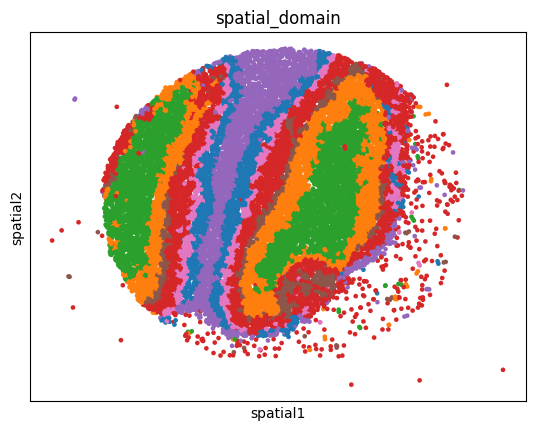

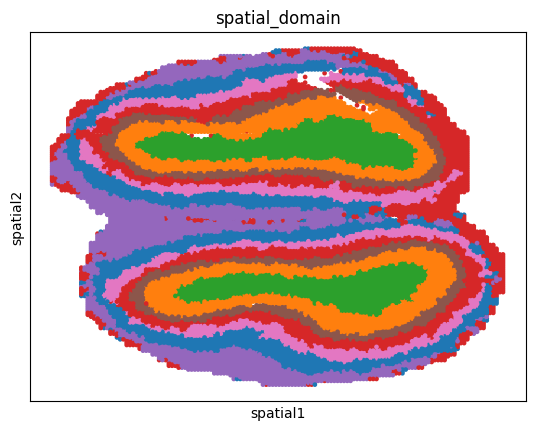

In [20]:
plt.figure(figsize=(11,2))
k=1
for i in [ 0,1 ]:
    sc.pl.embedding(adata_list[i], basis='spatial', color='spatial_domain', s=45, show=False,legend_loc=False)

In [1]:
import sys
sys.path

['D:\\bio\\jupyter_code\\MouseOlfactoryBulb',
 'D:\\anaconda\\envs\\SPACEL\\python38.zip',
 'D:\\anaconda\\envs\\SPACEL\\DLLs',
 'D:\\anaconda\\envs\\SPACEL\\lib',
 'D:\\anaconda\\envs\\SPACEL',
 '',
 'C:\\Users\\23147\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'D:\\anaconda\\envs\\SPACEL\\lib\\site-packages',
 'D:\\anaconda\\envs\\SPACEL\\lib\\site-packages\\win32',
 'D:\\anaconda\\envs\\SPACEL\\lib\\site-packages\\win32\\lib',
 'D:\\anaconda\\envs\\SPACEL\\lib\\site-packages\\Pythonwin']

In [4]:
import os
print(os.getcwd())#显示当前路径
os.chdir('D:/bio/SPACEL/SPACEL-main')#更改路径，''里面为更改的路径
print(os.getcwd())#显示当前路径

import matplotlib.pyplot as plt 
import SPACEL.Splane.utils
import pandas as pd
import scanpy as sc
import anndata as ad

D:\bio\SPACEL\SPACEL-main
D:\bio\SPACEL\SPACEL-main


In [5]:
sample_names = ["10X","slide","stereo"]
input_dir = 'G:/dataset/09-Mouse olfactory bulb/input/35um/'
output_dir = 'G:/dataset/09-Mouse olfactory bulb/output/35um/SPACEL/'
experiment_name = 'MouseOlfactoryBulb'

In [11]:
adata_list = []
for sample in sample_names:
    adata_temp = sc.read_h5ad(input_dir+sample+'.h5ad')
    adata_temp.obsm['spatial'] = adata_temp.obs[['x', 'y']].values
    adata_temp.obsm['spatial'] = adata_temp.obsm['spatial'].astype('float')
    adata_list.append(adata_temp)

print(adata_list)

[AnnData object with n_obs × n_vars = 1185 × 32285
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'X', 'celltype', 'batch', 'row', 'col', 'x', 'y', 'imagerow', 'imagecol'
    var: 'features'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 18537 × 5531
    obs: 'orig.ident', 'nCount_slide', 'nFeature_slide', 'celltype', 'batch', 'x', 'y'
    var: 'features'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 8827 × 5531
    obs: 'orig.ident', 'nCount_stereo', 'nFeature_stereo', 'celltype', 'batch', 'x', 'y'
    var: 'features'
    obsm: 'spatial']


## Pairwise alignment
Here, we perform pairwise alignment of slices. The cluster_key is a column of .obs which contain spatial domain information used for alignment. The n_neighbors affect how much neighbors are considered when calculate similarity of two slices. The knn_exclude_cutoff affect max distance of neighbors. By default, knn_exclude_cutoff = n_neighbors, which means a spot/cell in source slices consider knn_exclude_cutoff neighbors in target slices, and neighbor will be exclude when the distance of neighbors larger than the median of neareast knn_exclude_cutoff + n_neighbors neighbors distance in all spot/cell in target slice. p affect the exponent of overlap penalty, and a larger p means stronger partial alignment capability.

In [12]:
from SPACEL import Scube
Scube.align(adata_list,
  cluster_key='celltype', 
  n_neighbors = 4, 
  p=1,
  write_loc_path = output_dir + experiment_name + '_aligned_coordinates.csv'
 )

# sc.concat(adata_list).write('../data/ST_mouse_brain/mouse_brain_st.h5ad')

Start alignment...
Alignment slice 1 to 0
Alignment slice 2 to 1
Runtime: 2496.46834564209 s


In [ ]:
# type(adata_list[0].obs['Cell_class'].cat.categories)

In [13]:
for adata in adata_list:
    adata.obs['spatial_domain'] = adata.obs['celltype'].astype("category")

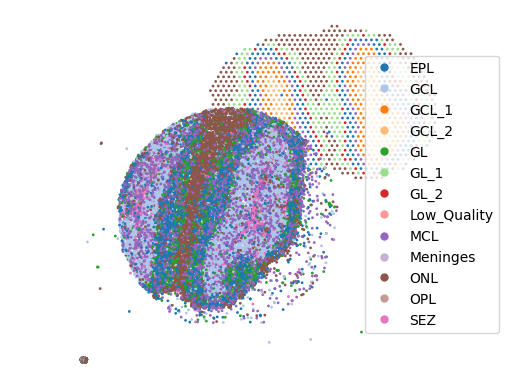

In [14]:
Scube.plot_stacked_slices(adata_list,spatial_key='spatial',cluster_key='spatial_domain')
plt.savefig(output_dir + experiment_name + "_spatial.png", dpi=300)

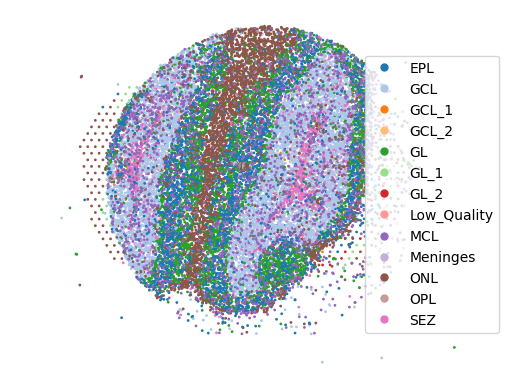

In [15]:
Scube.plot_stacked_slices(adata_list,spatial_key='spatial_pair',cluster_key='spatial_domain')
plt.savefig(output_dir + experiment_name + "_spatial_pair.png", dpi=300)

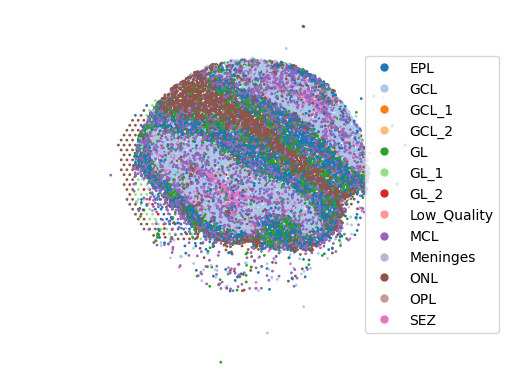

In [16]:
Scube.plot_stacked_slices(adata_list,spatial_key='spatial_aligned',cluster_key='spatial_domain')
plt.savefig(output_dir + experiment_name + "_spatial_aligned.png", dpi=300)

In [12]:
# import seaborn as sns
# slice_colors = sns.color_palette(n_colors = 6).as_hex()
df = pd.DataFrame()
for i in range(len(adata_list)):
    df = pd.concat([df,adata_list[i].obs],axis=0)

series = df['spatial_domain']
series = series.astype("category")

celltype_num = len(series.value_counts().index)
celltypes = series.value_counts().index.tolist()
print(celltype_num)

import seaborn as sns
colors = sns.color_palette(n_colors = celltype_num).as_hex()

print(colors)

7
['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']


D:\bio\SPACEL\SPACEL-main\SPACEL\Scube\plot.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(loc[:,0], loc[:,1], loc[:,2],c=color,*args,**kwargs)


G:/dataset/06-Mouse olfactory bulb/output/25um/SPACEL/MouseOlfactoryBulb_spatial_aligned_3d.png


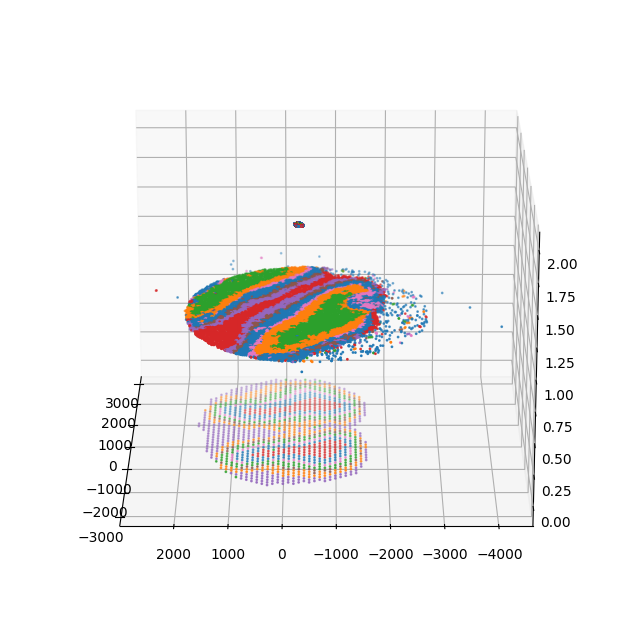

In [14]:
coo = pd.DataFrame()
for i in range(len(adata_list)):
    loc = adata_list[i].obsm['spatial_aligned'].copy()
    loc['Z'] = i
    loc['celltype_colors'] = adata_list[i].obs['spatial_domain'].replace(dict(zip(celltypes, colors)))
    coo = pd.concat([coo,loc],axis=0)
path = output_dir + experiment_name + "_spatial_aligned_3d.png"
Scube.plot_3d(coo.values[:,:3],val=None,color=coo['celltype_colors'],show=True,elev=20,azim=180,s=1,save_path=path, save_dpi=300)

In [15]:
print(adata.raw.var)
# adata.raw.var.columns = ['gene']

     features
0       Jade3
1        Psd4
2        Lrat
3       Grb14
4       Rasd2
...       ...
3659  Gm32200
3660  Gm30173
3661    Dkkl1
3662   Rbfox1
3663     Tsks

[3664 rows x 1 columns]


In [16]:
for i in range(len(adata_list)):
    adata = adata_list[i]
    dataset = sample_names[i]
    adata.raw.var.columns = ['gene']
    print(adata.isbacked)
    adata.filename = output_dir + 'SPACEL_aligned_' + dataset + '.h5ad'
    print(adata.isbacked)

False
True
False
True
False
True
